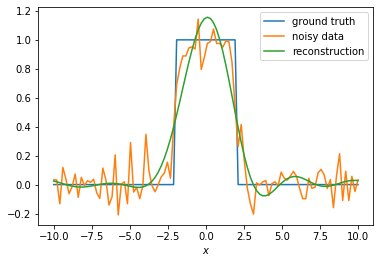

In [377]:
import numpy as np
import matplotlib.pyplot as plt

# grid and parameters
T = 2
delta = 1e-1
alpha = 20
n = 100
x = np.linspace(-10,10,n)
xi = np.fft.rfftfreq(n, d=1.0)

# define ground truth
u = np.heaviside(2-np.abs(x),1)

# define operator
gh = np.exp(-T*(2*np.pi*xi)**2)
K = lambda u : np.fft.irfft(np.fft.rfft(u)*gh)

# define regularised inverse
w = lambda alpha : np.piecewise(xi, [alpha*np.abs(xi) <= 1, alpha*np.abs(xi) > 1], [1, 0])
R = lambda alpha,f : np.fft.irfft(w(alpha)*np.fft.rfft(f)/gh)

# generate noisy data
f_delta = K(u) + delta*np.random.randn(n)

# reconstruction
u_alpha_delta = R(alpha,f_delta)

# plot
plt.plot(x,u,label='ground truth')
plt.plot(x,f_delta,label='noisy data')
plt.plot(x,u_alpha_delta,label='reconstruction')
plt.xlabel(r'$x$')
plt.legend()
plt.show()

Text(0, 0.5, 'relative error')

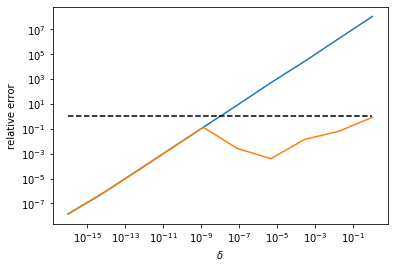

In [404]:
def reconstruct(u, delta, alpha, nsamples = 10):
    
    error = 0
    for k in range(nsamples):
        # generate noisy data
        f_delta = K(u) + delta*np.random.randn(n)

        # reconstructions 
        u_alpha_delta = R(alpha,f_delta)

        # compute error
        error += np.linalg.norm(u - u_alpha_delta)/np.linalg.norm(u)/nsamples
    
    #
    return error

alpha1 = lambda delta : delta
alpha2 = lambda delta : 20*delta**(1/8)
ns = 10
delta = np.logspace(-16,0,ns)
error1 = np.zeros(ns)
error2 = np.zeros(ns)

for k in range(ns):
    error1[k] = reconstruct(K(u), delta[k], alpha1(delta[k]),nsamples=100)
    error2[k] = reconstruct(K(u), delta[k], alpha2(delta[k]),nsamples=100)
    
plt.loglog(delta,error1,delta,error2,delta,1+0*delta,'k--')
plt.xlabel(r'$\delta$')
plt.ylabel(r'relative error')